# 1 Loading

In [1]:
# Importing essential modules
import os
import cv2
import keras
import pandas            as pd
import numpy             as np
from numpy                     import take
import matplotlib.pyplot as plt
import torch.utils.data  as data
from keras.models              import Sequential
from keras.layers              import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils               import to_categorical, image_dataset_from_directory
from keras.preprocessing       import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection   import train_test_split
from keras.utils               import to_categorical
from tqdm                      import tqdm
from torchvision.datasets      import ImageFolder

In [2]:
# Changing directory
path = 'C:\\Users\\16466\\Capstone_Project_3\\data'
os.chdir(path)
os.getcwd()

'C:\\Users\\16466\\Capstone_Project_3\\data'

In [3]:
# Reading directory of interest
dir = r'C:\Users\16466\Capstone_Project_3\data'

# Data loading 
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
    

# Creating training dataset
train_data = train_gen.flow_from_directory(dir, target_size =(224, 224), 
                                          batch_size=32, class_mode='binary',
                                           subset='training')
    
# Creating test dataset
test_data = train_gen.flow_from_directory(dir, target_size=(224, 224),
                                          batch_size=32, class_mode='binary',
                                          subset='validation')

train_dataset = image_dataset_from_directory(dir,
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))

Found 3942 images belonging to 5 classes.
Found 1689 images belonging to 5 classes.
Found 5631 files belonging to 5 classes.


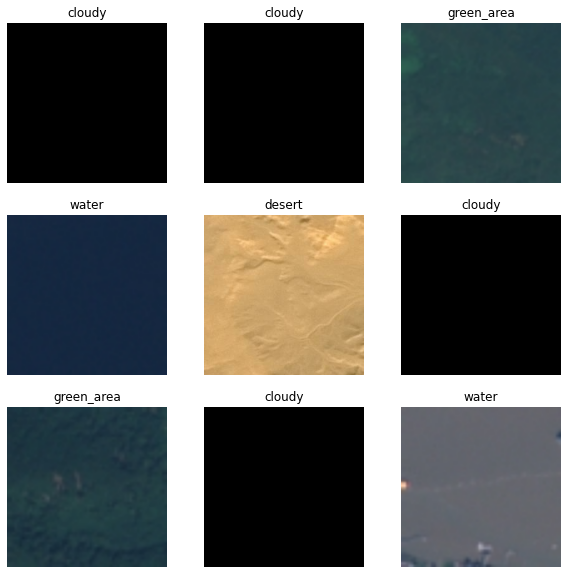

In [5]:
# Deriving class lables
class_name =  train_dataset.class_names

# Printing out 
plt.figure(figsize = (10,10))
for image, label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

# 2 Preprocessing

In [11]:
# Checking dimensions
print(image[0])
# Initalizing model
model = Sequential()

# Creating CNN model
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32)


In [12]:
# Getting summary of model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 186624)            0         
                                                                 
 dense_4 (Dense)             (None, 256)              